# CNN

CNN implementation with Tensorflow

Sources:
https://www.tensorflow.org/tutorials/images/cnn

## Dependencies

In [1]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
import matplotlib.pyplot as plt

## Load dataset
We will use the CIFAR10 dataset containing 60k color images in 10 classes, 6k per class.

In [2]:
# (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

MNIST dataset option (comment out CIFAR10 cell)

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# reshape to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [4]:
# normalize pixel values
X_train = X_train.astype(float) / 255.
X_test = X_test.astype(float) / 255.

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Visualize dataset
Each image is 32 x 32 and has 3 channels (rgb), hence 32 x 32 x 3

In [6]:
print('Feature matrix:', X_train.shape)
print('Target matrix:', X_test.shape)
print('Feature matrix:', y_train.shape)
print('Target matrix:', y_test.shape)

Feature matrix: (60000, 28, 28, 1)
Target matrix: (10000, 28, 28, 1)
Feature matrix: (60000,)
Target matrix: (10000,)


In [7]:
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_train[i])
#     # The CIFAR labels happen to be arrays, 
#     # which is why you need the extra index
#     plt.xlabel(class_names[y_train[i][0]])
# plt.show()

## Create our model
Our model will be processing images with RGB color channels hence each input image is of 32 x 32 x 3 dimension. Our convolutional base uses a common pattern: a stack of Conv2D and MaxPooling2D layers.

In [8]:
model = Sequential([
    #
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=X_train[0].shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(.2),
    #
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(.1),
    #
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
])

Conv2D params:
- filters: dimensionality of the output space (how many output filters in the convolution)

View the architecture of the model so far:

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

Note that all layers do not have padding applied hence the loss of 2 layers for a kernel of size 3 x 3.

The output of every Conv2D and MaxPooling2D is a 3D tensor of shape (height, width, channels). Number of output channels is controlled by the filter argument in Conv2D which specifies how many filters are applied to this layer. i.e. 32 filters = 32 channels.

As width and height shrinks it will be more computationally affordable to add more output channels in each Conv2D layer.

## Classification
To complete the model, we will feed the last output tensor (4,4,64) into one more more dense layers to perform classification. Flatten the 3D tensor into 1D before feeding it into the first dense layer.

In [10]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

## Complete model
Compile with optimizer (Adam, SGD etc) and loss calculation (MSE etc)

In [12]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## Train

In [13]:
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.1888 - accuracy: 0.9405 - val_loss: 0.0700 - val_accuracy: 0.9791
Epoch 2/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0551 - accuracy: 0.9823 - val_loss: 0.0575 - val_accuracy: 0.9840
Epoch 3/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0421 - accuracy: 0.9869 - val_loss: 0.0410 - val_accuracy: 0.9879
Epoch 4/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0348 - accuracy: 0.9887 - val_loss: 0.0373 - val_accuracy: 0.9895
Epoch 5/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0277 - accuracy: 0.9911 - val_loss: 0.0444 - val_accuracy: 0.9879
Epoch 6/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.0383 - val_accuracy: 0.9890
Epoch 7/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0207 - accuracy: 0.9931 - val_loss: 0.0396 -

## Evaluate

accuracy: training data accuracy

val_accuracy: validation split accuracy

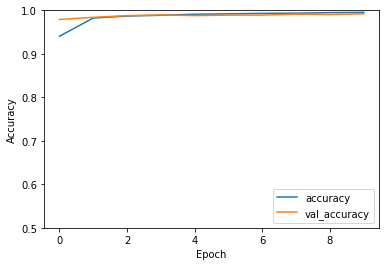

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## Results

In [15]:
results = model.evaluate(X_test, y_test, verbose=0)
print('test loss, test acc:', results)

test loss, test acc: [0.0307389535009861, 0.9919000267982483]


## Results analysis
CIFAR10
* Default model from TensorFlow tutorial: 0.71

MNIST
* Default model from TensorFlow tutorial: 0.99

## Save model

In [16]:
model.save("CNN_mnist")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: CNN_mnist\assets
